In [4]:
import warnings
from importlib import reload

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import wrangle as w

In [2]:
warnings.simplefilter("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [70]:
reload(w)
dfs = w.get_rpdr_data()
train, validate, test = w.split_queens(dfs)
ep_train = train.groupby(['season','episode']).first().iloc[:,10]



# Snatch Game
## Q1: Is winning the snatch game a good indication of winning a season?

In [77]:
train[train.outco]

SAFE             276
HIGH             127
WIN              102
BTM               95
LOW               74
ELIM              67
Guest             15
RTRN              11
OUT                5
LOSS               5
STAY               4
RUNNING            3
LOST3RD ROUND      2
Eliminated         2
TOP2               2
TOP 4              2
SAVE               1
WIN+RTRN           1
WDR                1
SAFE+DEPT          1
Runner-up          1
LOST1ST ROUND      1
DISQ               1
Miss C             1
MISSCON            1
LOST2ND ROUND      0
Winner             0
Name: outcome, dtype: int64

<AxesSubplot: ylabel='count'>

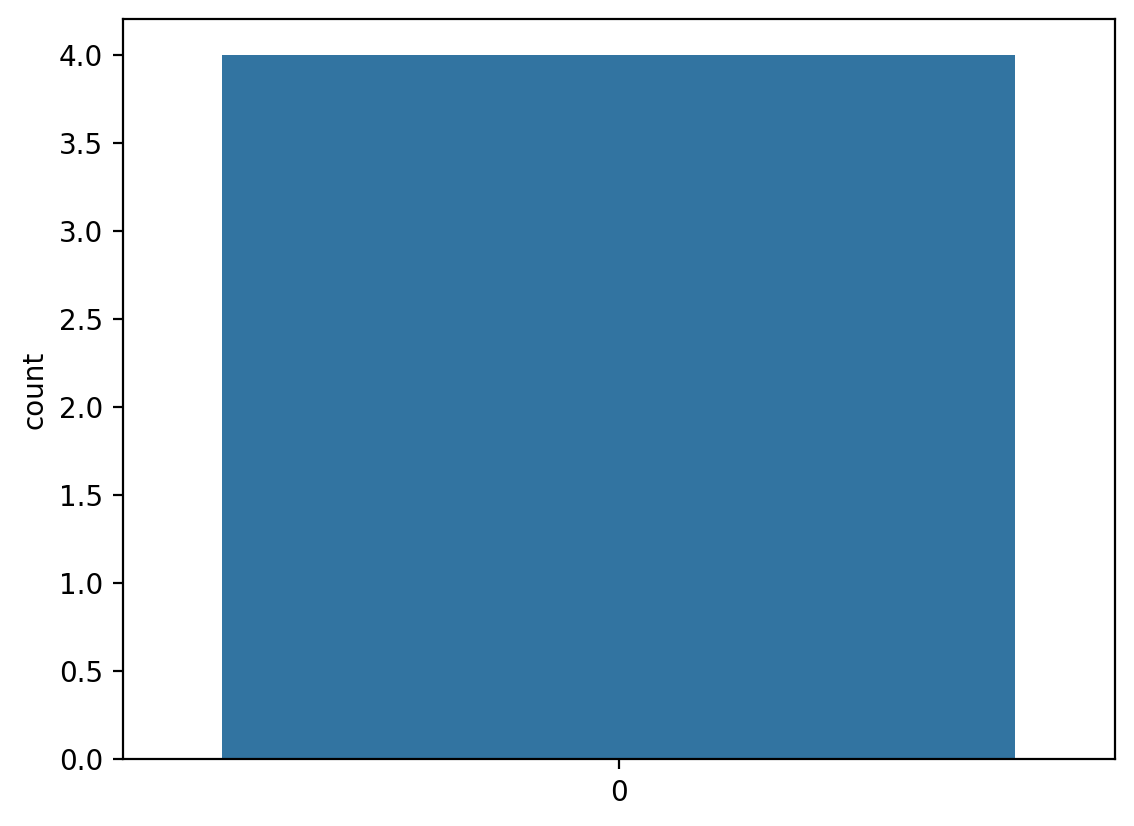

In [72]:
sns.countplot(data=snatch_game_winners)